In [1]:
import os
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from mapPrinter import plotResults, getMapImage, saveMapInts
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from MicropolisControlScript import Quimby
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
import numpy as np
import pickle 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline

# Genetic Algorithm to build micropolis city

We can load a save if we want, instead of re-training the GA

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
mapSize:20, chromosome_len:400, n_population:50, n_steps_evaluation:35, nb_generations:20, eval:last
crossover:split, mutation_rate:0.2, p_selection:0.2, couple_size:5
best score in last gen = 95420


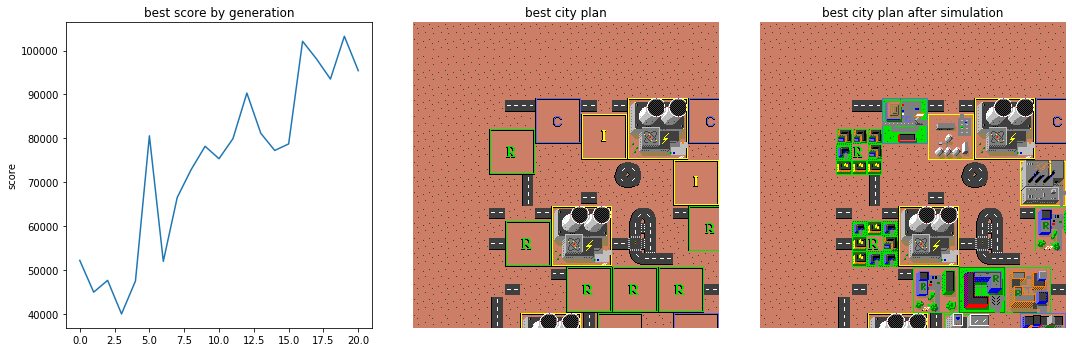

<Figure size 1080x360 with 0 Axes>

In [2]:
q = pickle.load(open('saves/s_test_savescore.obj', 'rb'))

plt.rcParams['figure.figsize'] = [15, 5]
plotResults(q)

Training the GA

In [2]:
# Parameters
map_size = 30
chromosome_len = 20
steps = 39 # For 5 years of simulation
nb_generations = 10
eval = "last"
n_population = 50

# The next parameters are interesting to cross map :
crossover = "switch"
mutation_rate = 0.2
p_selection = 0.2
couple_size = 5
nb_splits = 1

# Run the algorithm
q = Quimby(map_w=map_size,map_h=map_size,chromosome_len=chromosome_len,n_population=n_population,n_steps_evaluation=steps)
q.ga(nb_generations=nb_generations, mutation_rate=mutation_rate, p_selection=p_selection, couple_size=couple_size,crossover=crossover, nb_splits=nb_splits, eval=eval)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
mapSize:30, chromosome_len:20, n_population:50, n_steps_evaluation:39, nb_generations:10, eval:last
crossover:switch, mutation_rate:0.2, p_selection:0.2, couple_size:5
best score in last gen = 1620


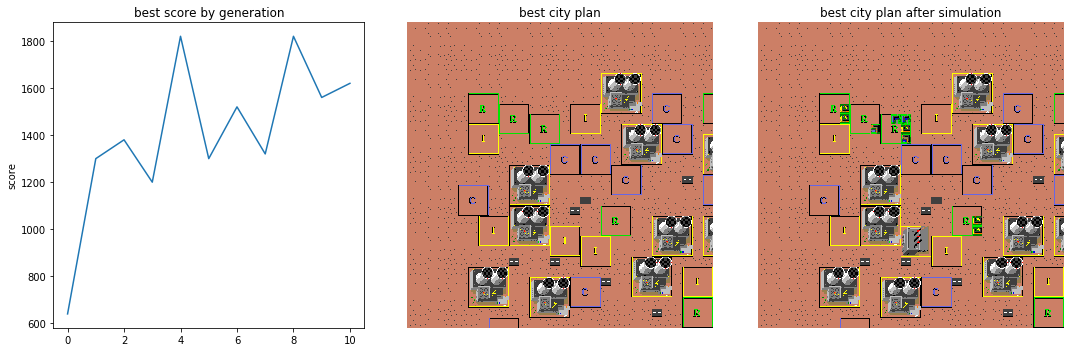

<Figure size 1080x360 with 0 Axes>

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]
plotResults(q)

Saves population on file so that we can open it in a new notebook to display the results

In [24]:
pickle.dump(q, open("saves/64test.obj", 'wb') )

In [17]:
pickle.dump(q, open("saves/s_test_savescore.obj", 'wb') )

# Visualize map

Let's pick the best city in our genome :

In [3]:
city = q.genomes[np.argmax(q.populations)]

### Create control environment

In [4]:
from gym_micropolis.envs.corecontrol import MicropolisControl
from mapPrinter import printMapAscii, getMapImage, showMap
import random

Creates the MicropolisControl generic class to run the engine on the city plan

Make sure you have a Quimby class loaded into q for the variables

In [7]:
# city = q.genomes[random.randint(0,q.n_population)]

try:m.close()
except:pass
m = q.build_city(city=city, display=False)
avg_pop = 0
pop_run = 0

Show the pretty map

--------------------------------
|      #  #     ##   #RRRIII   |
|#         CCCRRRIII  RRRIII   |
| III # RRRCCCRRRIII  RRRIII   |
| III # RRRCCCRRRIIICCC        |
| III   RRR    III #CCC  ###   |
|#   #   #RRR  III# CCC# RRRIII|
| RRR RRR RRR  III# NNNN RRRIII|
| RRR RRR RRR #RRR  NNNN RRRIII|
| RRR RRR RRR #RRR# NNNN      #|
|  NNNNRRRRRR# RRR  NNNN       |
| #NNNNRRRRRR          #III    |
|# NNNNRRR       #      III III|
|  NNNN #      III   RRRIII III|
|# #     NNNN# III   RRR    III|
|   NNNN NNNN  III#  RRR III   |
|   NNNN NNNN CCC##      III   |
|   NNNN NNNN CCC     #  III   |
|   NNNN RRR  CCC        NNNN  |
| RRR    RRR  #       #  NNNN  |
|#RRR CCCRRR# #          NNNN  |
| RRR CCC     RRR   #    NNNN  |
|  RRRCCC #  #RRR    RRR #     |
|  RRR  #     RRR# # RRRCCC    |
|  RRR RRR        ## RRRCCC CCC|
|  NNNNRRR # NNNN      #CCC CCC|
|  NNNNRRR   NNNN #RRR      CCC|
|  NNNN      NNNN  RRR #       |
|  NNNN III  NNNN  RRR#   RRR  |
|      #III        #      RRR  |
|  ##   II

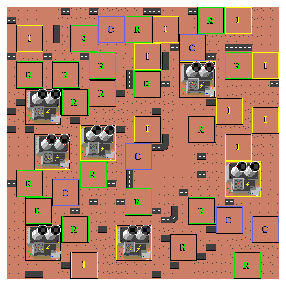

In [8]:
printMapAscii(m.getTileMap())
showMap(m)

In [32]:
print(m.engine.cityYear, m.engine.cityMonth)
print(m.engine.cityPop,m.engine.totalPop, m.engine.cityScore)

1900 0
0 1 500


In [34]:
print(m.engine.cityYear, m.engine.cityMonth)
print(m.engine.cityPop,m.engine.totalPop, m.engine.cityScore)

1905 1
5920 39 420


5920 2416.5714285714284


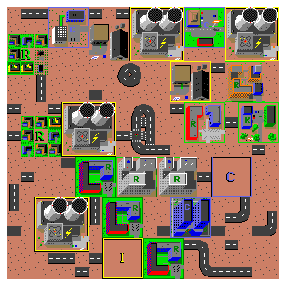

In [33]:
# Run simulation for steps
pop = 0
for i in range(39) :
    m.engine.simTick()
    pop += m.engine.cityPop
avg_pop = (avg_pop*pop_run + pop/q.n_steps_evaluation)/(pop_run+1)
pop_run +=1
print(m.engine.cityPop, avg_pop)
showMap(m)

In [220]:
m.close()

In [52]:
print(m.engine.cityScore)

629


In [53]:
print(q.eval)

score


# Generate Study Maps

# Generate GAN maps

In [1]:
import os
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from mapPrinter import getMapImage, saveMapInts
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
from MicropolisControlScript import Quimby
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")
import numpy as np
import pickle

In [4]:
# Parameters
map_size = 64
chromosome_len = 200
steps = 39 # For 5 years of simulation
nb_generations = 10
eval = "last"
n_population = 50

# The next parameters are interesting to cross map :
crossover = ["switch", "split"]
mutation_rate = [0, 0.2, 0.5]
p_selection = [0.2]
couple_size = [2, 5]
# nb_splits = [1, 5]

savepath="saves/gan_cross/"
filename=""

if not os.path.exists(savepath):
    os.makedirs(savepath)

In [ ]:
for c in crossover:
    for mr in mutation_rate:
        for p in p_selection:
            for cs in couple_size:
                
                filename = "c_"+c+"-m_"+str(int(100*mr))+"-p_"+str(int(100*p))+"-cs_"+str(cs)
                print(filename)
                
                # Run the algorithm
                q = Quimby(map_w=map_size,map_h=map_size,chromosome_len=200,n_population=n_population,n_steps_evaluation=steps)
                q.ga(nb_generations=nb_generations, mutation_rate=mr, p_selection=p, couple_size=cs,crossover=c, eval=eval)
                
                score = q.pop_progression[-1]
                filename = filename + "-bestScore_"+str(score)
                
                # Save the quimby class
                pickle.dump(q, open(savepath+filename+".obj", 'wb') )
                
                # Generate all the maps and save them
                for cityindex in range(len(q.genomes)):

                    cityname = filename+"-city_"+str(cityindex)+"-score_"+str(q.populations[cityindex])
                    # print("    "+cityname)
                    
                    m = q.build_city(city=q.genomes[cityindex], display=False)
                    
                    getMapImage(m.getTileMap()).save(savepath+cityname+".png","PNG")
                    saveMapInts(m.getTileMap(), savepath+cityname+".npy")
                    
                    m.close()
             

# Create a image from ints

In [1]:
from mapPrinter import getMapImage, showMap
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/home/branche/ML_TERM/gym-micropolis-ga/")

mat = np.load("saves/small_cross/c_split-m_0-p_20-cs_2-bestScore_6040-city_0-score_6040.npy")

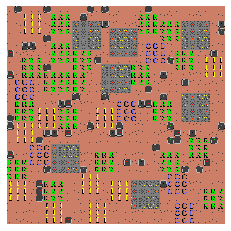

In [2]:
showMap(mat,True)